## Filtros

In [8]:
%matplotlib inline

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.util import random_noise

#### Filtro Gaussiano

In [9]:
kernel_1d = cv.getGaussianKernel(ksize=5, sigma=1.5)
kernel_2d = kernel_1d * kernel_1d.T
print(kernel_1d)

print(kernel_2d)
print(f'ganancia: {np.sum(kernel_2d)}')

[[0.12007838]
 [0.23388076]
 [0.29208172]
 [0.23388076]
 [0.12007838]]
[[0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.0350727  0.06831229 0.08531173 0.06831229 0.0350727 ]
 [0.02808402 0.05470021 0.06831229 0.05470021 0.02808402]
 [0.01441882 0.02808402 0.0350727  0.02808402 0.01441882]]
ganancia: 0.9999999999999999


In [19]:
img_orig = cv.imread('chewbacca.jpg')
 
kX = cv.getGaussianKernel(ksize=17, sigma=5)
kY = cv.getGaussianKernel(ksize=17, sigma=5)
 
result_a = cv.sepFilter2D(img_orig,  ddepth=-1, kernelX=kX, kernelY=kY)

result_b = cv.GaussianBlur(img_orig, ksize=(17, 17), sigmaX=5,  sigmaY=5)

out1 = cv.hconcat([result_b, result_a])


#cv.imshow("Chewbacca - sepFilter2D", out1)
#cv.imshow("Chewbacca - GaussianBlur", img_orig)

In [20]:
# Redimensionar la imagen
scale_percent = 50  # Porcentaje del tamaño original
width = int(out1.shape[1] * scale_percent / 100)
height = int(out1.shape[0] * scale_percent / 100)
dim = (width, height)

resized_out1 = cv.resize(out1, dim, interpolation=cv.INTER_AREA)

# Redimensionar la imagen original (después de aplicar GaussianBlur)
resized_img_orig = cv.resize(img_orig, (int(out1.shape[1] * scale_percent / 200), height), interpolation=cv.INTER_AREA)

cv.imshow("Chewbacca - sepFilter2D / GaussianBlur ", resized_out1)
cv.imshow("Chewbacca - Original", resized_img_orig)


#### Filtro de media y mediana



In [21]:
img2 = cv.imread('tapitas.jpg',0)

noise_img = random_noise(img2, mode="s&p", amount=0.3)
noise_img = np.array(255*noise_img, dtype = 'uint8')

# Aplicar el filtro de media
mean = cv.blur(noise_img, (5,5))

# Aplicar el filtro de mediana
median = cv.medianBlur(noise_img, 5)
 
# Mostrar la imagen
cv.imshow('Original + S&P', noise_img)
cv.imshow('Media', mean)
cv.imshow('Mediana', median)

#### DoG

In [22]:
img_orig = cv.imread('tapitas.jpg',0)
#img_orig = cv.imread('chewbacca.jpg',0)

low_sigma = cv.GaussianBlur(img_orig, (5,5), sigmaX=1)
high_sigma = cv.GaussianBlur(img_orig, (5,5),sigmaX=1.5)

dog = low_sigma - high_sigma

median = cv.medianBlur(dog, 5)

out1 = cv.hconcat([img_orig, dog, median])
cv.namedWindow("DoG", 2)
cv.imshow("DoG",out1)

#### Unsharp masking

/var/folders/4m/9vg3db2s47g494p14wdtf6jr0000gn/T/ipykernel_44393/2651573753.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


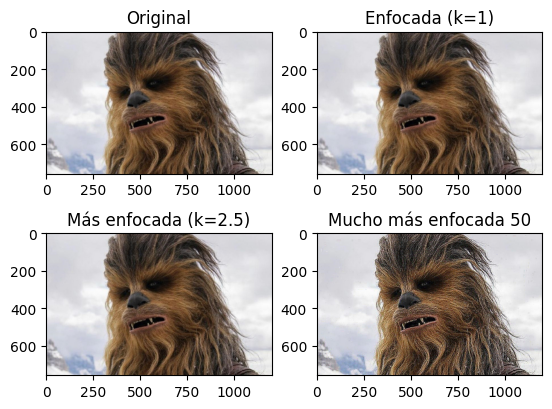

In [23]:
# Cargar la imagen
img_orig = cv.imread("chewbacca.jpg")
# La convertimos a RGB
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
# Suavizar la imagen
gauss = cv.GaussianBlur(img_orig, (7,7), 0.5)
# Aplicar la máscara de enfoque:
img_sharp = cv.addWeighted(img_orig, 2, gauss, -1, 0) #k=1

# Más enfocada
k=2.5
img_sharp2 = cv.addWeighted(img_orig, k+1, gauss, -k, 0)

# Mucho más enfocada
k=50
img_sharp3 = cv.addWeighted(img_orig, k+1, gauss, -k, 0)


# Nueva figura
fig = plt.figure()

ax1=plt.subplot(221)
ax1.set_title('Original')
ax1.imshow(img_orig)
ax2=plt.subplot(222)
ax2.set_title('Enfocada (k=1)')
ax2.imshow(img_sharp)
ax3=plt.subplot(223)
ax3.set_title('Más enfocada (k=2.5)')
ax3.imshow(img_sharp2)
ax4=plt.subplot(224)
ax4.set_title(f'Mucho más enfocada {k}')
ax4.imshow(img_sharp3)

fig.show()